<a href="https://colab.research.google.com/github/maximoalva/TP1-AprendizajeAutomaticoII/blob/main/Problema1/problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico N°1 - Redes Densas y Convolucionales

---
Aprendizaje Automático I

Tecnicatura Universitaria en Inteligencia Artificial

Facultad de Ciencias Exactas, Ingeniería y Agrimensura

Universidad Nacional de Rosario

2025

Estudiantes:

*   Máximo Alva
*   María Sol Aranda

# Problema 1

---
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento
académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El
objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de
rendimiento académico de los estudiantes basado en las características proporcionadas.



## Preparación del entorno

Importar librerías.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Descargar y descomprimir el dataset.

In [ ]:
!gdown 1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
!unzip TP1-1-student_performance.zip
!rm TP1-1-student_performance.zip

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /content/TP1-1-student_performance.zip
100% 49.7k/49.7k [00:00<00:00, 83.0MB/s]
Archive:  TP1-1-student_performance.zip
  inflating: Student_Performance.csv  


Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

## Análisis exploratorio

### Descripción del dataset

In [ ]:
df = pd.read_csv('Student_Performance.csv')
print(f"El dataset cuenta con {df.shape[0]} registros y {df.shape[1]} variables.")

El dataset cuenta con 10000 registros y 6 variables.


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


El dataset proporcionado incluye las siguientes variables para cada estudiante:



*   **Hours Studied**: El número total de horas dedicadas al estudio por cada estudiante.
*   **Previous Scores**: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
*   **Extracurricular Activities**: Si el estudiante participa en actividades extracurriculares (Sí o
No).
*   **Sleep Hours**: El número promedio de horas de sueño que el estudiante tuvo por día.
*   **Sample Question Papers Practiced**: El número de cuestionarios de muestra que el estudiante
practicó.
*   **Performance Index**: Un índice que representa el rendimiento académico general de cada
estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores
más altos indican un mejor rendimiento.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
print(f"Valores únicos 'Hours Studied': {df["Hours Studied"].unique()}")
print(f"\nValores únicos 'Previous Scores': {df["Previous Scores"].unique()}")
print(f"\nValores únicos 'Extracurricular Activities': {df["Extracurricular Activities"].unique()}")
print(f"\nValores únicos 'Sleep Hours': {df["Sleep Hours"].unique()}")
print(f"\nValores únicos 'Sample Question Papers Practiced': {df["Sample Question Papers Practiced"].unique()}")
print(f"\nValores únicos 'Performance Index': {df["Performance Index"].unique()}")

Valores únicos 'Hours Studied': [7 4 8 5 3 6 2 1 9]

Valores únicos 'Previous Scores': [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]

Valores únicos 'Extracurricular Activities': ['Yes' 'No']

Valores únicos 'Sleep Hours': [9 4 7 5 8 6]

Valores únicos 'Sample Question Papers Practiced': [1 2 5 6 0 8 3 4 9 7]

Valores únicos 'Performance Index': [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]


No observamos valores extraños.

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Distribuciones

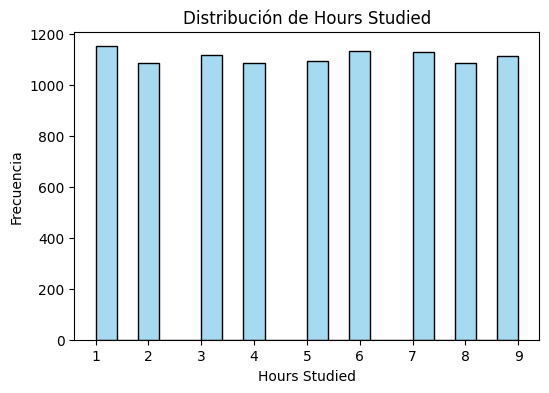

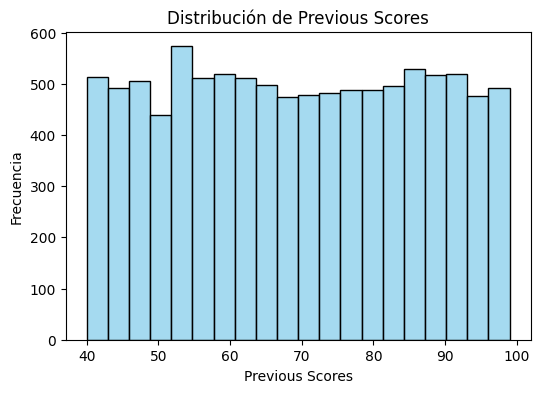

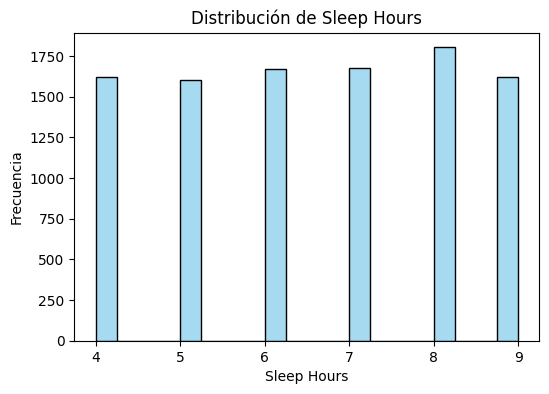

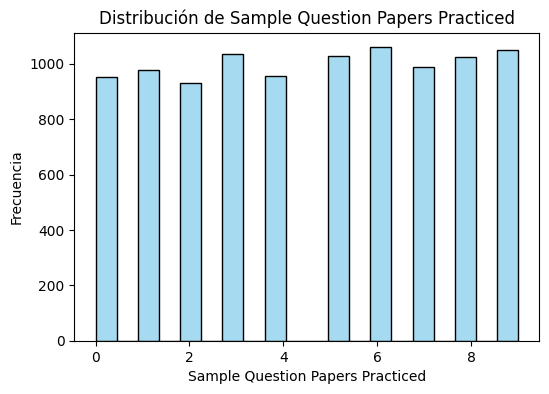

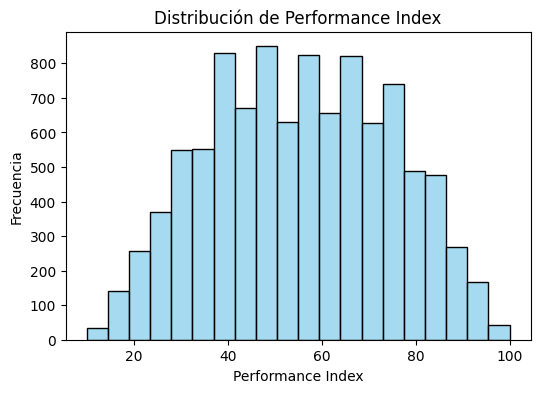

In [ ]:
for col in ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, color='skyblue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

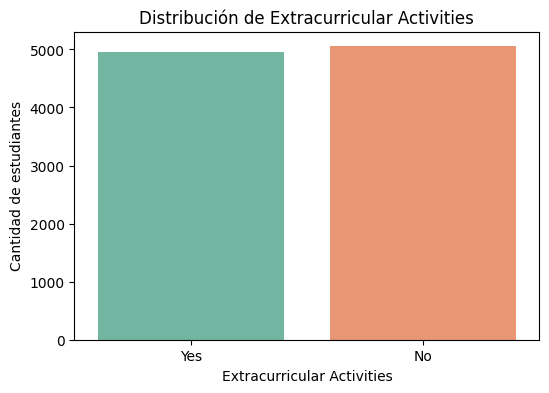

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Extracurricular Activities", hue="Extracurricular Activities", palette="Set2")
plt.title("Distribución de Extracurricular Activities")
plt.ylabel("Cantidad de estudiantes")
plt.show()

### Matriz de correlación

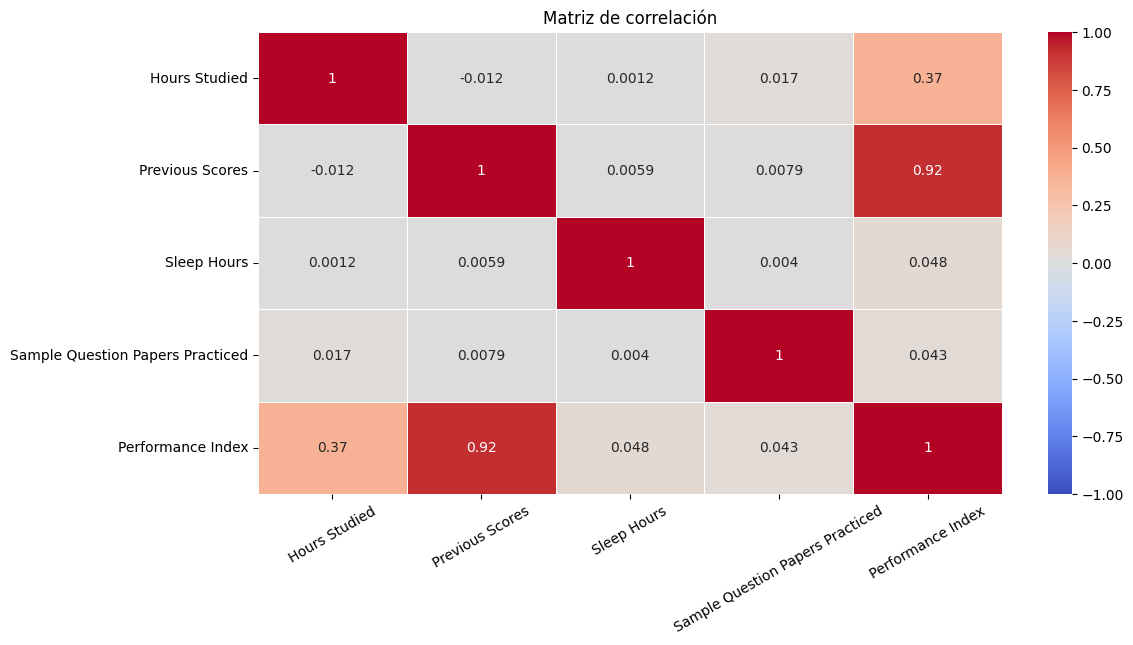

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.drop(['Extracurricular Activities'], axis=1).corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap='coolwarm')
plt.title("Matriz de correlación"), plt.xticks(rotation=30)
plt.show()

Observamos que 'Previous Scores' y 'Performance Index' tienen una correlación de 0.92, indicando una relación lineal muy fuerte. En menor medida, también notamos una relación lineal moderada entre 'Hours Studied' y 'Performance Index', con una correlación de 0.37.

## Preprocesamiento de los datos

### División del dataset en conjuntos de entrenamiento y prueba

Split en 80% train, 20% test.

In [ ]:
X = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}\ty_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}\t\ty_test shape: {y_test.shape}")

X_train shape: (8000, 5)	y_train shape: (8000,)
X_test shape: (2000, 5)		y_test shape: (2000,)


### Codificación de variables categóricas

Mapeamos la variable 'Extracurricular Activities'.
*   Yes --> 1
*   No --> 0





In [ ]:
X_train["Extracurricular Activities"] = X_train["Extracurricular Activities"].map({"Yes": 1, "No": 0})
X_test["Extracurricular Activities"] = X_test["Extracurricular Activities"].map({"Yes": 1, "No": 0})

X_train["Extracurricular Activities"].head()

,Extracurricular Activities
9254,0
1561,1
1670,0
6087,0
6669,0


### Escalar variables numéricas

Escalamos las variables numéricas para asegurar que todas las features contribuyan de manera equilibrada al entrenamiento y mejorar la estabilidad y velocidad de convergencia. Aunque en este dataset en particular la diferencia no fue significativa, constituye una buena práctica en general.

In [ ]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

## Modelo

### Definición

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

### Compilación

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse', metrics=["mae"])

### Entrenamiento

In [ ]:
history = model.fit(
  X_train_scaled, y_train,
  epochs=60,
  verbose=1
)

Epoch 1/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7040 - mae: 1.7251
Epoch 2/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3384 - mae: 1.6432
Epoch 3/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3602 - mae: 1.6661
Epoch 4/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2880 - mae: 1.6520
Epoch 5/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5106 - mae: 1.6887
Epoch 6/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5261 - mae: 1.6920
Epoch 7/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4273 - mae: 1.6736
Epoch 8/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3061 - mae: 1.6453
Epoch 9/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3826 - mae: 1.6584
Epoch 10/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4698 - mae: 1.6839
Epoch 11/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5177 - mae: 1.6917
Epoch 12/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3055 - mae: 1.6507
Epoch 13/60
250/250 ━━━━━

### Evaluación

In [ ]:
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Absolute Error (MAE) en test: {mae:.2f}")
print(f"Mean Squared Error (MSE) en test: {loss:.2f}")

Mean Absolute Error (MAE) en test: 1.65
Mean Squared Error (MSE) en test: 4.25


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


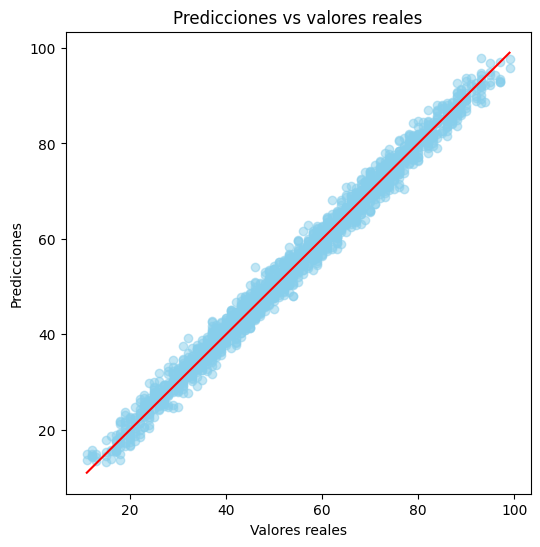

In [ ]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # línea perfecta
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs valores reales")
plt.show()

In [ ]:
errors = y_test - y_pred.flatten()
print(f"Error promedio: {np.mean(errors):.2f}")
print(f"Desviación estándar del error: {np.std(errors):.2f}")
print(f"Error máximo: {np.max(errors):.2f}")
print(f"Error mínimo: {np.min(errors):.2f}")

Error promedio: -0.26
Desviación estándar del error: 2.05
Error máximo: 6.54
Error mínimo: -8.02


El modelo implementado logró una buena capacidad predictiva para estimar el Performance Index de los estudiantes a partir de las variables de entrada.
El mismo alcanzó un MAE de 1.65 y un MSE de 4.25 sobre el conjunto de prueba, reflejando un error promedio bajo en relación con el rango de la variable objetivo.

El análisis de errores mostró un promedio de -0.26 y una desviación estándar de 2.05, indicando ausencia de sesgo y buena consistencia en las predicciones. La gráfica de predicciones vs valores reales evidencia una alta correlación entre ambas variables, confirmando el buen ajuste del modelo.

En conclusión, la red neuronal cumplió con el objetivo de predecir el rendimiento académico de manera precisa.